<a href="https://colab.research.google.com/github/dennismathewjose/Data-Mining-IE7275/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


_boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   

In [ ]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [38]:
#Load boston housing dataset
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
boston_housing = pd.read_csv("BostonHousing.csv")
X = boston_housing.drop(['medv'], axis=1)

#"target" is the response variable
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['medv']

--2025-03-28 02:02:09--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0.005s  

2025-03-28 02:02:10 (6.38 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



In [39]:
data = X
data['medv'] = y

In [40]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
data.shape

(506, 14)


**TODO 1**

Prevent collinearity by removing linearly dependent variables.

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

Correlation Matrix (excluding target 'medv'):


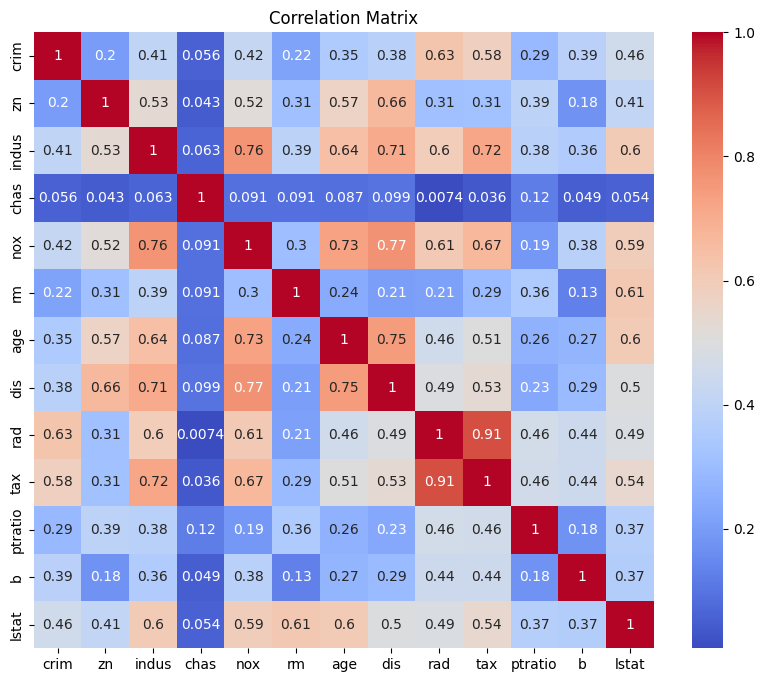


Features to drop (correlation > 0.9): ['tax']
Dropped due to high correlation: ['tax']
Shape after dropping: (506, 13)


In [42]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np

# STEP 2: Creating a copy to df, so it won't alter the original data
df = data

# STEP 3: Compute correlation matrix (excluding target 'medv')
corr_matrix = df.drop(columns='medv').corr().abs()

#increasing the size of the graph to view it better
plt.figure(figsize=(10, 8))
print("Correlation Matrix (excluding target 'medv'):")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# STEP 4: Get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# STEP 5: Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("\nFeatures to drop (correlation > 0.9):", to_drop)

# STEP 6: Drop those features
df_cleaned = df.drop(columns=to_drop)

# Display dropped columns and cleaned dataframe shape
print("Dropped due to high correlation:", to_drop)
print("Shape after dropping:", df_cleaned.shape)


**TODO 2**

Partition the data into 75% training and 25% validation set.

In [43]:
# STEP 1: Import train_test_split
from sklearn.model_selection import train_test_split

# STEP 2: Define features and target
# Use data_reduced instead of df_cleaned by copying to data_reduced
data_reduced = df_cleaned
X = data_reduced.drop(columns='medv')
y = data_reduced['medv']

# STEP 3: Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# STEP 4: Confirm the shapes
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (379, 12)
Validation set size: (127, 12)



**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights?

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [44]:
# STEP 1: Convert training data to NumPy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)  # reshape for matrix multiplication

# STEP 2: Add bias (intercept) term to X matrix
ones = np.ones((X_train_np.shape[0], 1))
X_train_bias = np.hstack((ones, X_train_np))

# STEP 3: Compute weights using Normal Equation: w = (XᵀX)^(-1)Xᵀy
XTX = X_train_bias.T @ X_train_bias
XTy = X_train_bias.T @ y_train_np
weights = np.linalg.inv(XTX) @ XTy

# STEP 4: Display weights (first value is intercept)
feature_names_with_intercept = ['intercept'] + X_train.columns.tolist()
weights_df = pd.DataFrame(weights, index=feature_names_with_intercept, columns=['Weight'])
print(weights_df)

              Weight
intercept  28.259949
crim       -0.127924
zn          0.019811
indus      -0.011380
chas        3.008054
nox       -17.328678
rm          4.451349
age        -0.008677
dis        -1.382094
rad         0.117091
ptratio    -0.952931
b           0.013454
lstat      -0.514006



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice.

Present the model summary. We call this model **Model 1**.

In [45]:
# STEP 1: Import statsmodels
import statsmodels.api as sm

# STEP 2: Select only AGE and RM as predictors
X_train_model1 = X_train[['age', 'rm']]
X_val_model1 = X_val[['age', 'rm']]

# STEP 3: Add intercept term for statsmodels
X_train_model1_sm = sm.add_constant(X_train_model1)

# STEP 4: Fit linear regression model
model1 = sm.OLS(y_train, X_train_model1_sm).fit()

# STEP 5: Show model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     222.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.54e-64
Time:                        02:02:30   Log-Likelihood:                -1239.6
No. Observations:                 379   AIC:                             2485.
Df Residuals:                     376   BIC:                             2497.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.5875      3.273     -8.428      0.0


**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# STEP 1: Prepare validation set with intercept
X_val_model1_sm = sm.add_constant(X_val_model1)

# STEP 2: Predict on validation set
y_pred_model1 = model1.predict(X_val_model1_sm)

# STEP 3: Compute RMSE and MAE
rmse_model1 = np.sqrt(mean_squared_error(y_val, y_pred_model1))
mae_model1 = mean_absolute_error(y_val, y_pred_model1)

# STEP 4: Print metrics
print("Model 1 (AGE & RM) Performance:")
print(f"RMSE: {rmse_model1:.4f}")
print(f"MAE:  {mae_model1:.4f}")

Model 1 (AGE & RM) Performance:
RMSE: 6.0919
MAE:  3.9240


### Analysis
- An RMSE of 6.09 suggests that, on average, the predictions deviate from the actual values by about 6 units.
-The MAE of 3.92 suggests that the model's predictions are off by approximately 3.92 units on average.

The model's performance is moderate, but an RMSE of 6.09 indicates a noticeable prediction error.

The gap between RMSE and MAE suggests that the model has some large errors (outliers affecting RMSE).


**TODO 6**

Now consider all the features (after removing linearly dependent variables).

Fit a linear regression model on the training set with a package at your choice. Present the model summary.

We call this model **Model 2**.

In [47]:
# STEP 1: Add intercept term to full feature training set
X_train_model2 = sm.add_constant(X_train)

# STEP 2: Fit linear regression model using statsmodels
model2 = sm.OLS(y_train, X_train_model2).fit()

# STEP 3: Show model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     88.88
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          1.52e-100
Time:                        02:02:38   Log-Likelihood:                -1129.1
No. Observations:                 379   AIC:                             2284.
Df Residuals:                     366   BIC:                             2335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2599      5.854      4.828      0.0


**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [48]:
# STEP 1: Prepare validation set with intercept
X_val_model2 = sm.add_constant(X_val)

# STEP 2: Predict on validation set
y_pred_model2 = model2.predict(X_val_model2)

# STEP 3: Compute RMSE and MAE
rmse_model2 = np.sqrt(mean_squared_error(y_val, y_pred_model2))
mae_model2 = mean_absolute_error(y_val, y_pred_model2)

# STEP 4: Print results
print(" Model 2 (All Features) Performance:")
print(f"RMSE: {rmse_model2:.4f}")
print(f"MAE:  {mae_model2:.4f}")

 Model 2 (All Features) Performance:
RMSE: 4.8052
MAE:  3.1398


### Analysis
-  Model 2 has a lower RMSE (4.81 vs. 6.09) and MAE (3.14 vs. 3.92), indicating that including all features improves predictions significantly.


**TODO 8**

Compare the performance of Model 1 and Model 2.

Visualize the prediction error of both models using histogram.

Comment on the model fitting.

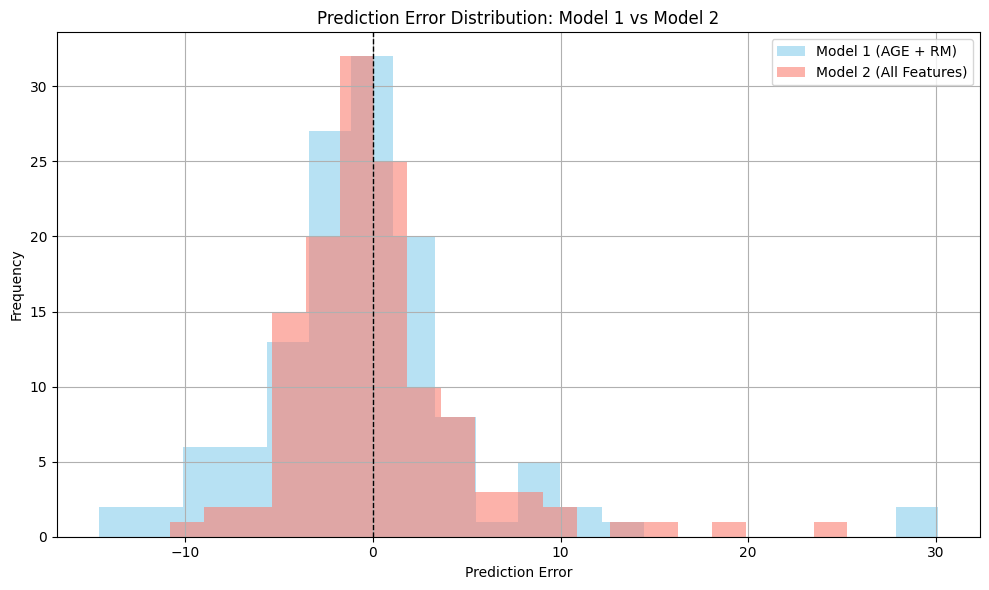

In [49]:
import matplotlib.pyplot as plt

# STEP 1: Calculate prediction errors
error_model1 = y_val - y_pred_model1
error_model2 = y_val - y_pred_model2

# STEP 2: Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(error_model1, bins=20, alpha=0.6, label='Model 1 (AGE + RM)', color='skyblue')
plt.hist(error_model2, bins=20, alpha=0.6, label='Model 2 (All Features)', color='salmon')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Prediction Error Distribution: Model 1 vs Model 2")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis
- The wider spread of errors in Model 1 suggests underfitting—it does not capture the complexity of the data well.

- The error distribution in Model 2 is tighter around zero, indicating better alignment with the actual data.
-Model 2 exhibits a better fit than Model 1, but the presence of some outliers suggests that further optimization (regularization, feature selection) might be necessary to prevent overfitting.
- In conclusion - Model 1 is underfitted, failing to capture sufficient patterns in the data, while Model 2 has a better fit due to its reduced error spread and higher prediction accuracy.


**TODO 9**

Now consider all the features (after removing linearly dependent variables).

The goal is to fit a LASSO linear regression model on the training set with a package at your choice.

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

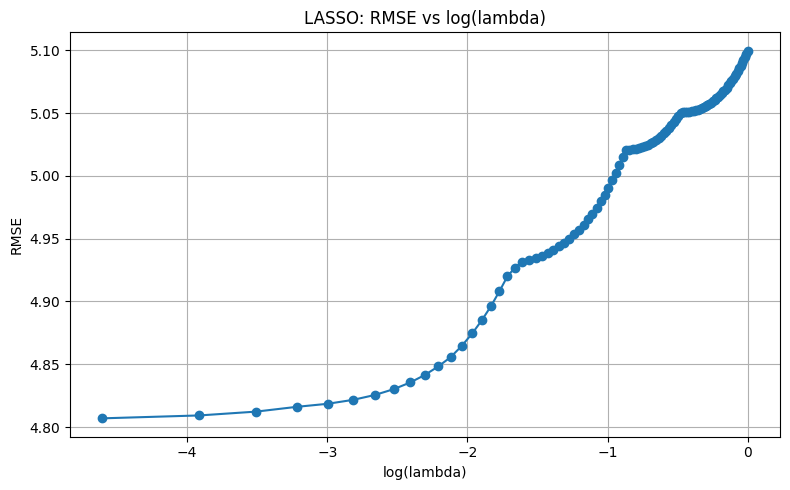

Best lambda: 0.01 with RMSE: 4.8069

LASSO Coefficients (Model 3):
crim      -1.031672
zn         0.434701
indus     -0.058980
chas       0.792184
nox       -2.010261
rm         3.208657
age       -0.221294
dis       -2.836075
rad        0.948713
ptratio   -2.134958
b          1.163737
lstat     -3.674509
dtype: float64

Model 3 Summary:
- Best lambda: 0.01
- RMSE on validation set: 4.8069
- Number of non-zero coefficients: 12


In [51]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas
from sklearn.preprocessing import StandardScaler

# STEP 1: Scale features for LASSO (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# STEP 2: Try lambda (alpha) from 0.01 to 1.0
alphas = np.arange(0.01, 1.01, 0.01)
rmse_list = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_val_scaled)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_list.append(rmse)

# STEP 3: Plot RMSE vs log(lambda)
plt.figure(figsize=(8, 5))
plt.plot(np.log(alphas), rmse_list, marker='o')
plt.xlabel('log(lambda)')
plt.ylabel('RMSE')
plt.title('LASSO: RMSE vs log(lambda)')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4: Find best lambda and fit final model (Model 3)
best_alpha = alphas[np.argmin(rmse_list)]
print(f"Best lambda: {best_alpha:.2f} with RMSE: {min(rmse_list):.4f}")

# STEP 5: Fit LASSO using best lambda
model3 = Lasso(alpha=best_alpha, max_iter=10000)
model3.fit(X_train_scaled, y_train)

# Coefficients summary
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]
coefficients = pd.Series(model3.coef_, index=feature_names)
print("\nLASSO Coefficients (Model 3):")
print(coefficients)

# Present the model summary (manually, since Lasso doesn't have .summary())
print("\nModel 3 Summary:")
print(f"- Best lambda: {best_alpha:.2f}")
print(f"- RMSE on validation set: {min(rmse_list):.4f}")
print(f"- Number of non-zero coefficients: {np.sum(model3.coef_ != 0)}")



**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [52]:
from sklearn.metrics import mean_absolute_error

# STEP 1: Predict on validation set using Model 3
y_pred_model3 = model3.predict(X_val_scaled)

# STEP 2: Calculate RMSE and MAE
rmse_model3 = np.sqrt(mean_squared_error(y_val, y_pred_model3))
mae_model3 = mean_absolute_error(y_val, y_pred_model3)

# STEP 3: Print results
print(" Model 3 (LASSO) Performance:")
print(f"RMSE: {rmse_model3:.4f}")
print(f"MAE:  {mae_model3:.4f}")


 Model 3 (LASSO) Performance:
RMSE: 4.8069
MAE:  3.1340



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

Among the three models, Model 2 (All Features) is my choice for future implementation because:
- The goal of LASSO is to introduce sparsity by eliminating less important features. However, in this case, Model 3 (LASSO) did not show any meaningful improvement over Model 2, which suggests that most features in Model 2 were actually relevant and shouldn't be removed.
- Model 1 (which only used AGE and RM) had significantly worse RMSE (6.0919) and MAE (3.9240).This confirms that a simplified model with just two features is inadequate for capturing the complexity of the data.

## Part 2: K-Nearst-Neighbors

### Problem 2 ##

The wine dataset is the result of a chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and k-NN classifier.

In [2]:
# load the wine dataset
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [3]:
# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
print(X.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [ ]:
data = X.copy()
data['target'] = y

**TODO 1**

Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why?

If so, partition the data into 75% training and 25% validation set, then standardize them.

#### Answer:
- Yes, I would recommend scaling the data before modelling.
  - The k-NN algorith calculates (Euclidean distance) between data points to determine the nearest neighbors. Since the dataset contains features with varying scales (e.g., "Proline" ranges from 278 to 1680, while "Hue" ranges from 0.48 to 1.71), features with larger magnitudes will dominate the distance calculations. This could bias the model, making it less effective.

  - Standardization (z-score normalization) ensures that each feature has a mean of 0 and a standard deviation of 1, which allows all features to contribute equally to the distance metric.

In [4]:
#Part 1 - Splitting the dataset to 76% training and 25% validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Partition the data (75% training, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
# Part 2 - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert back to DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)

X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.236559,-0.251792,-0.198888,1.022172,-0.988943,-2.061582,-0.997567,1.439295,-0.276962,-0.500842,-1.059931,-1.105294,-0.899513
1,0.471235,-1.148588,0.084820,-0.583153,0.605759,0.040900,-1.669946,2.122708,-2.547002,-0.580144,-0.195227,-2.179623,-0.123512
2,-1.206921,2.582525,0.191211,0.584356,-1.111613,0.644221,0.858782,-1.196728,2.124403,-0.805850,-1.862871,1.569563,-1.219392
3,-1.264001,-0.285007,-1.617431,0.146540,-0.866274,-0.013947,-1.172971,0.365359,-0.670935,-1.257261,-0.689344,-1.061444,-1.115727
4,1.030620,-0.451080,1.006873,0.292479,0.912433,0.808763,1.399608,0.658251,-0.108116,1.512210,0.484183,-0.776419,1.001987


**TODO 2**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try different k values from 1 to 10
k_values = range(1, 11)
accuracies = []

print("k-value | Accuracy")
print("------------------")

for k in k_values:
    # Train k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_pred = knn.predict(X_val_scaled)

    # Compute accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

    print(f"{k:<7} | {acc:.4f}")

# Find the best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest k: {best_k} with accuracy: {max(accuracies):.4f}")


k-value | Accuracy
------------------
1       | 0.9697
2       | 0.9394
3       | 0.9394
4       | 0.9091
5       | 0.9697
6       | 0.9394
7       | 0.9394
8       | 0.9394
9       | 0.9697
10      | 0.9394

Best k: 1 with accuracy: 0.9697


**TODO 3**

Classify the new record given below using the chosen k.

Considering the size of the wine dataset, would you recommend data partition before scoring the new record? Why?

### Answer:

- Since the wine dataset is relatively small, I would recommend using the entire dataset (instead of just the training set) to train the final k-NN model before scoring the new record.

#### Why?
- More data for training → With a small dataset, using more data improves model generalization.

- Avoiding data leakage is not a concern → We are scoring a completely new record, so there's no risk of contamination.

- Improved stability → A model trained on the full dataset would be more stable and reliable.

Thus, before classifying the new record, we will train k-NN on the full dataset using the best
𝑘

In [7]:
# Standardize the new record using the same scaler (fitted on all data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# New record
new_wine = pd.DataFrame(columns = wine['feature_names'])
new_wine.loc[0,:] = np.array([14.12, 1.88, 2.31, 18.5, 125, 2.50, 3.12, 0.26, 2.12, 4.87, 1.02, 3.23, 955])
new_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.12,1.88,2.31,18.5,125.0,2.5,3.12,0.26,2.12,4.87,1.02,3.23,955.0


In [9]:

new_wine_scaled = scaler.transform(new_wine)

In [10]:
# Initialize k-NN with the best k (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_scaled, y)  # Train on standardized data

# Predict the class
predicted_class = knn.predict(new_wine_scaled)
print(f"\nPredicted class for the new wine: {predicted_class[0]}")


Predicted class for the new wine: 0


### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN classifier to predict the mpg with the given attributes.

In [24]:
# import the dataset "auto_mpg.csv"
data = pd.read_csv("auto_mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [25]:
data.shape

(393, 9)

**TODO 1**

Check the unique value of the variable "car name".

Would you recommend keeping "car name" for prediction? Why?

If not, eliminate the variable "car name".

In [26]:
# Check unique values
print("Number of unique car names:", data['car name'].nunique())

Number of unique car names: 301


#### Answer
- Based on this, I would NOT recommend keeping the "car name" variable for prediction because of the following reasons:

- Car names are typically unique identifiers (like "ford pinto", "amc rebel sst", etc.)

- They are categorical with high cardinality (many unique values)

- Names don't usually have a meaningful relationship with fuel efficiency

- k-NN relies on meaningful distances between points, and text names don't provide this

- Including it could lead to overfitting or poor generalization

In [27]:
# Drop the 'car name' column
data = data.drop('car name', axis=1)

**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [28]:
data = pd.get_dummies(data, columns=['origin'], prefix='origin', drop_first=True)

In [29]:
# Show the transformed data
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,False,False
1,15.0,8,350.0,165,3693,11.5,70,False,False
2,18.0,8,318.0,150,3436,11.0,70,False,False
3,16.0,8,304.0,150,3433,12.0,70,False,False
4,17.0,8,302.0,140,3449,10.5,70,False,False


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           393 non-null    float64
 1   cylinders     393 non-null    int64  
 2   displacement  393 non-null    float64
 3   horsepower    393 non-null    object 
 4   weight        393 non-null    int64  
 5   acceleration  393 non-null    float64
 6   model year    393 non-null    int64  
 7   origin_2      393 non-null    bool   
 8   origin_3      393 non-null    bool   
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 22.4+ KB


**TODO 3**

Rescale the numeric data. Note that dummy variables should not be rescaled.

In [31]:
#convert horsepower which is object to numeric data
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

#if horsepower contain null value impute it with mean
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

<ipython-input-31-2e0958e0053f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           393 non-null    float64
 1   cylinders     393 non-null    int64  
 2   displacement  393 non-null    float64
 3   horsepower    393 non-null    float64
 4   weight        393 non-null    int64  
 5   acceleration  393 non-null    float64
 6   model year    393 non-null    int64  
 7   origin_2      393 non-null    bool   
 8   origin_3      393 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 22.4 KB


In [33]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (excluding dummy variables)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Identify dummy variables (columns starting with 'origin_')
dummy_cols = [col for col in data.columns if col.startswith('origin_')]

# Separate numeric and dummy data
numeric_data = data[numeric_cols]
dummy_data = data[dummy_cols]


# Initialize and fit scaler on numeric data only
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_data)

# Convert back to DataFrame and recombine with dummy variables
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols, index=data.index)
data_scaled = pd.concat([scaled_numeric_df, dummy_data], axis=1)

# Verify the result
print(data_scaled.head())

        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.698642   1.484867      1.078523    0.664979  0.621628     -1.287786   
1 -1.083944   1.484867      1.490488    1.576602  0.844701     -1.469418   
2 -0.698642   1.484867      1.183909    1.185906  0.541369     -1.651050   
3 -0.955510   1.484867      1.049781    1.185906  0.537828     -1.287786   
4 -0.827076   1.484867      1.030620    0.925443  0.556712     -1.832683   

   model year  origin_2  origin_3  
0   -1.625418     False     False  
1   -1.625418     False     False  
2   -1.625418     False     False  
3   -1.625418     False     False  
4   -1.625418     False     False  


**TODO 4**

Partition the data into 75% training and 25% validation set.

In [34]:
from sklearn.model_selection import train_test_split

# First separate features (X) and target (y)
# Assuming 'mpg' is our target variable
X = data_scaled.drop('mpg', axis=1)
y = data_scaled['mpg']

# Split into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42  # for reproducibility
)

# Verify the shapes
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (294, 8)
Validation set shape: (99, 8)


**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

k = 1: Validation MSE = 0.2552
k = 2: Validation MSE = 0.2264
k = 3: Validation MSE = 0.2035
k = 4: Validation MSE = 0.1953
k = 5: Validation MSE = 0.2151
k = 6: Validation MSE = 0.2074
k = 7: Validation MSE = 0.2064
k = 8: Validation MSE = 0.1973
k = 9: Validation MSE = 0.2078
k = 10: Validation MSE = 0.2111

Best k: 4 with MSE: 0.1953


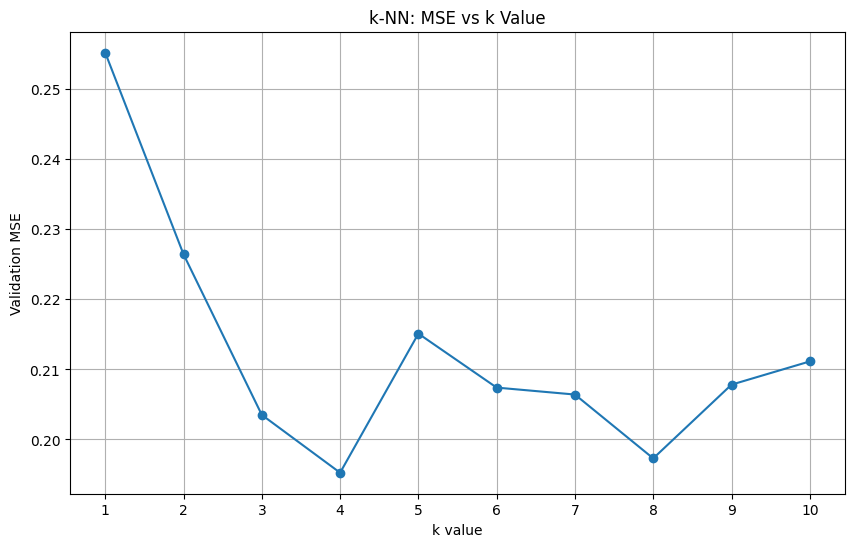

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dictionary to store MSE values
mse_values = {}

# Try k values from 1 to 10
for k in range(1, 11):
    # Create and fit k-NN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on validation set
    y_pred = knn.predict(X_val)

    # Calculate MSE
    mse = mean_squared_error(y_val, y_pred)
    mse_values[k] = mse
    print(f"k = {k}: Validation MSE = {mse:.4f}")

# Find k with minimum MSE
best_k = min(mse_values, key=mse_values.get)
print(f"\nBest k: {best_k} with MSE: {mse_values[best_k]:.4f}")

# Plot MSE vs k
plt.figure(figsize=(10, 6))
plt.plot(list(mse_values.keys()), list(mse_values.values()), marker='o')
plt.xlabel('k value')
plt.ylabel('Validation MSE')
plt.title('k-NN: MSE vs k Value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Analysis
The best value for k is 4, as indicated in the output, because:

- The Validation MSE for k = 4 is 0.1953, which is the lowest among all tested k values from 1 to 10.

- A lower MSE means the model generalizes better to unseen data, making k = 4 the optimal choice.

- Although k = 8 has a slightly lower MSE than some other values, k = 4 is still the absolute minimum in this range.

Thus, k = 4 is the best choice for the k-NN model based on validation MSE.

**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model with best k
best_k = 4
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on validation set
y_pred = knn_best.predict(X_val)

In [37]:
# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Performance on Validation Set (k={best_k}):")
print(f"- MSE:  {mse:.2f}")
print(f"- RMSE: {rmse:.2f} (mpg)")
print(f"- MAE:  {mae:.2f} (mpg)")
print(f"- R²:   {r2:.2f} (1.0 is perfect)")

Performance on Validation Set (k=4):
- MSE:  0.20
- RMSE: 0.44 (mpg)
- MAE:  0.30 (mpg)
- R²:   0.81 (1.0 is perfect)


### Model Performance Analysis
- R² (0.81) shows that 81% of the variance in the target variable is explained by the model, indicating a good fit.

- MSE (0.20) and RMSE (0.44 mpg) indicate a low level of prediction error, meaning the model is making reasonably accurate predictions.

- MAE (0.30 mpg) suggests that, on average, the model's predictions deviate from the actual values by about 0.30 mpg, which is relatively small.

Overall, The model generalizes well with a low prediction error and a high explanatory power (R² = 0.81).